<a href="https://colab.research.google.com/github/meghana1a/ML_Practice/blob/main/principle_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("breast_cancer_data.csv")
df.head

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [ ]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

PCA is an unsupervised learning algorithm so we drop diagnosis

(PCA uses only features)

In [ ]:
df_features = df.drop(['diagnosis'], axis=1)

Standarizing data values

In [ ]:
standardized = StandardScaler()

In [ ]:
standardized.fit(df_features)

StandardScaler()

In [ ]:
scaled_data = standardized.transform(df_features)

In [ ]:
pca = PCA(n_components=3)

In [ ]:
pca.fit(scaled_data)

PCA(n_components=3)

In [ ]:
x_pca = pca.transform(scaled_data)

In [ ]:
x_pca.shape

(569, 3)

In [ ]:
def diag(x):
    if x =='M':
        return 1
    else:
        return 0
df_diag= df['diagnosis'].apply(diag)

In [ ]:
x_pca[:1]

array([[ 9.19283683,  1.94858301, -1.12316673]])

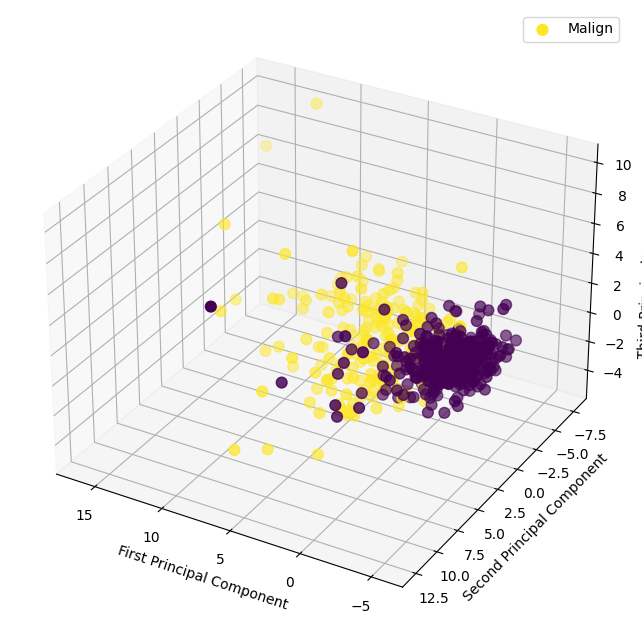

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=df_diag, s=60)
ax.legend(['Malign'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(30, 120)

Text(0, 0.5, 'Third Principal Component')

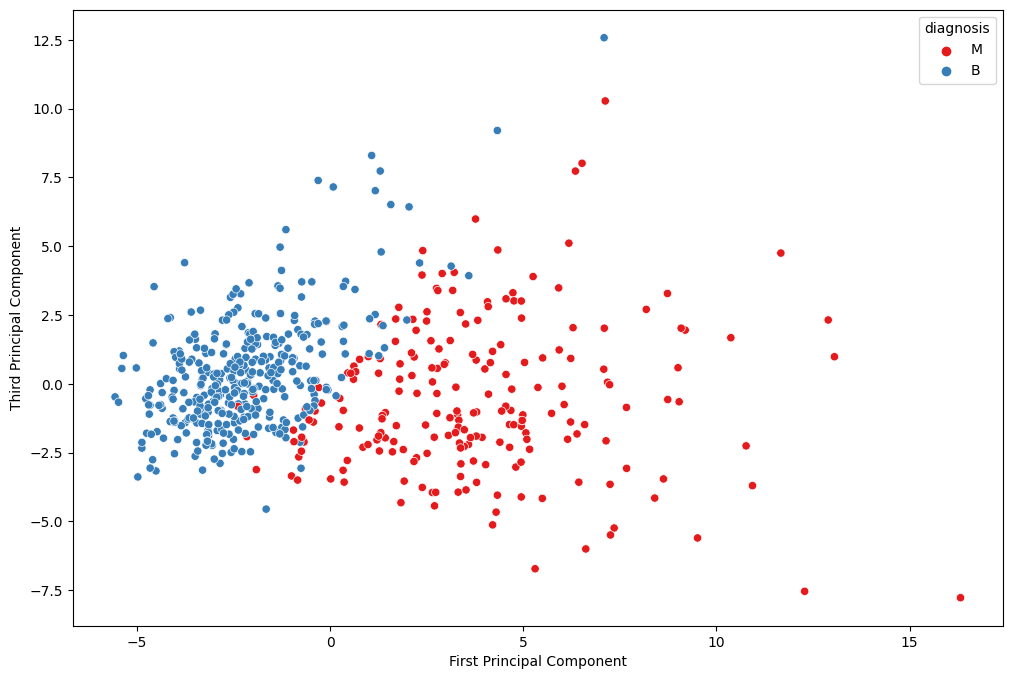

In [ ]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=df['diagnosis'], palette='Set1')
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')

Text(0, 0.5, 'Third Principal Component')

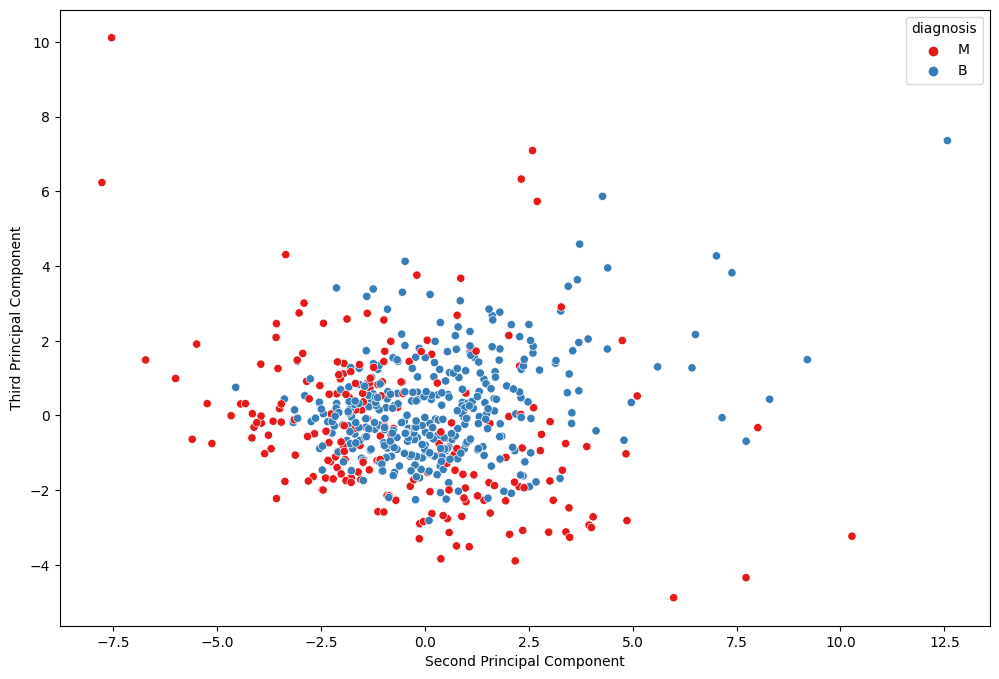

In [ ]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x=x_pca[:,1], y=x_pca[:,2],hue=df['diagnosis'], palette ='Set1' )
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')

Text(0, 0.5, 'Second Principal Component')

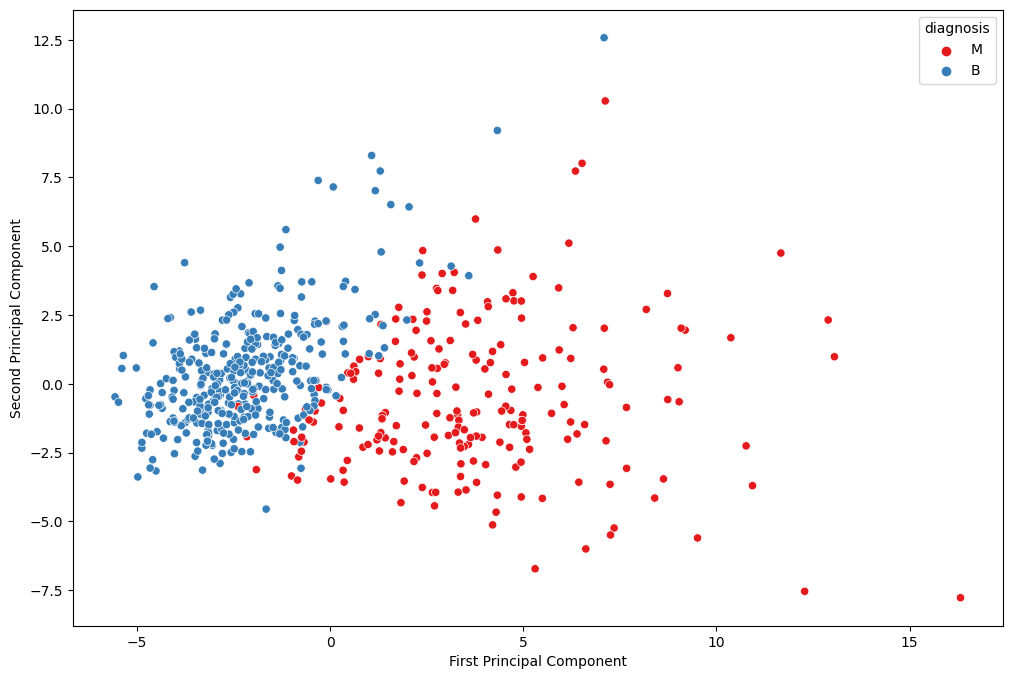

In [ ]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1],hue=df['diagnosis'], palette ='Set1' )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [ ]:
df_pc = pd.DataFrame(pca.components_, columns = df_features.columns)
df_pc

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048546,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791


Text(158.22222222222223, 0.5, 'Principal Components')

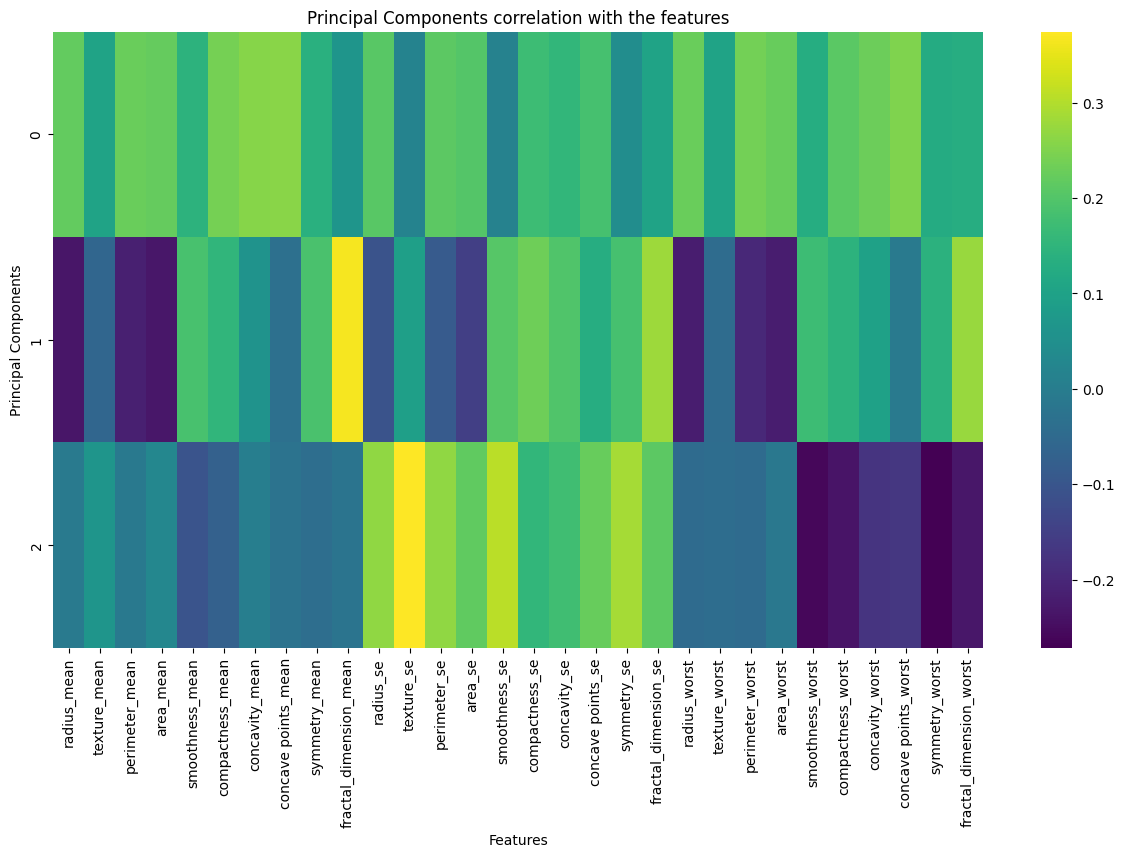

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_pc, cmap='viridis')
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')